<a href="https://colab.research.google.com/github/wangqy1216/Emotion-Prediction-in-the-Darkness/blob/master/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file is to compare different normalization methods for facial features.

I used KDEF dataset for testing.

LBF based facial landmark detection model is used to generate facial landmarks.

In [ ]:
!unzip drive/My\ Drive/KDEF.zip -d .

In [ ]:
from skimage import io
from skimage import util
import cv2
import math
from imutils import face_utils
import dlib
from google.colab.patches import cv2_imshow
import os
import glob
from skimage.transform import rescale, resize, downscale_local_mean
from google.colab.patches import cv2_imshow

In [ ]:
# used for accessing url to download files
import urllib.request as urlreq

# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "lbfmodel.yaml"

# save face detection algorithm's url in haarcascade_url variable
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# download picture from url and save locally as lbfmodel.yaml, < 54MB
urlreq.urlretrieve(LBFmodel_url, LBFmodel)
print("File downloaded")

# download file from url and save locally as haarcascade_frontalface_alt2.xml, < 1MB
urlreq.urlretrieve(haarcascade_url, haarcascade)
print("File downloaded")

# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

File downloaded
File downloaded


NameError: ignored

In [ ]:
# Facial iamge examples
image = cv2.imread('KDEF/AF01/AF01HAS.JPG')
clone = image.copy()
new_clone = image.copy()

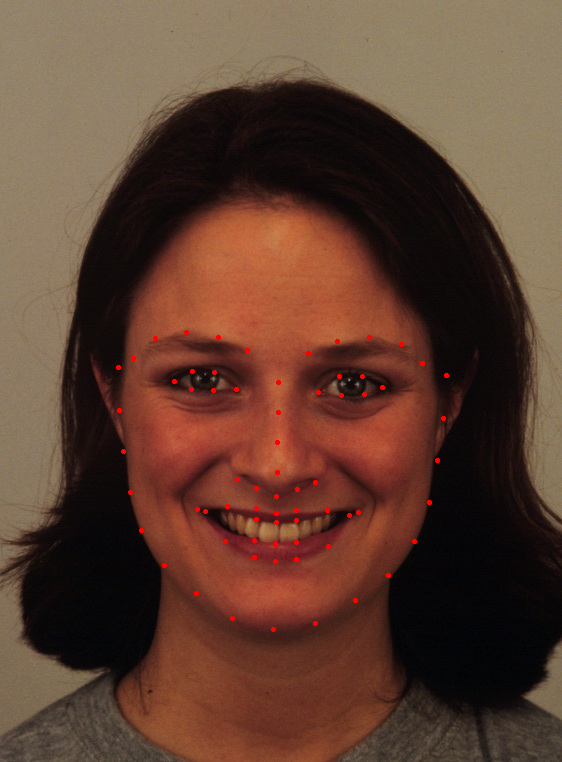

In [ ]:
gray = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(gray)

if len(faces) != 0:
  # Detect landmarks on "image_gray"
  _, landmarks = landmark_detector.fit(gray, faces)
  if len(landmarks) != 0:
    for landmark in landmarks:
      for x,y in landmark[0]:
          cv2.circle(clone, (x, y), 1, (0, 0, 255), 2)

cv2_imshow(clone)

In [ ]:
# Calculate the distance features from facial landmarks

def get_distance(point1, point2):
  
  if type(point1) == int:
    x1, y1 = landmarks[0][0][point1]
  elif type(point1) == list:
    x1, y1 = (landmarks[0][0][point1[0]] + landmarks[0][0][point1[1]]) / 2

  cv2.circle(new_clone, (x1, y1), 1, (0, 0, 255), 2)
  
  if type(point2) == int:
    x2, y2 = landmarks[0][0][point2]
  elif type(point2) == list:
    x2, y2 = (landmarks[0][0][point2[0]] + landmarks[0][0][point2[1]]) / 2

  cv2.circle(new_clone, (x2, y2), 1, (0, 0, 255), 2)

  return  math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

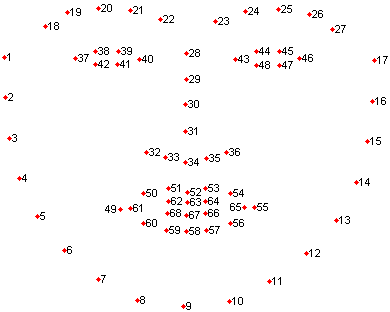

In [ ]:
# Select facial landmarks to extract features

new_clone = image.copy()
color = (0, 0, 255)
points_list = [22, # Left Eyebrow Inner Corner
               26, # Left Eyebrow Outer Corner
               17, # Right Eyebrow Outer Corner
               21, # Right Eyebrow Inner Corner
               24, # Left Eyebrow Middle
               [42, 45], # Left Eye Center
               19, # Right Eyebrow Middle
               [36, 39], # Right Eye Center
               42, # Left Eye Inner Corner
               39, # Right Eye Corner
               [43, 44], # Left Eye Up Middle
               [46, 47], # Left Eye Bottom Middle
               [38, 37], # Right Eye Up Middle
               [40, 41], # Right Eye Bottom Middle
               62, # Up Lip Middle(Down Edge)  
               66, # Down Lip Middle
               48, # Mouth Right Corner
               54, # Mouth Left Corner
               51, # Up Lip Middle(Up Edge)
               33, # Nose
               8]  # Jaw
counter = 0

for point in points_list:
  if (type(point) == int):
    x, y = landmarks[0][0][point]
    cv2.circle(clone, (x, y), 1, (0, 0, 255), 2)
    cv2.putText(new_clone, str(counter), ((int)(x - 25), (int)(y - 0)),
                  cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
    counter += 1
  else:
    x, y = (landmarks[0][0][point[0]] + landmarks[0][0][point[1]]) / 2
    cv2.circle(clone, (x, y), 1, (0, 0, 255), 2)
    cv2.putText(new_clone, str(counter), ((int)(x - 25), (int)(y - 0)),
                  cv2.FONT_HERSHEY_SIMPLEX, 0.5, color , 2)
    counter += 1

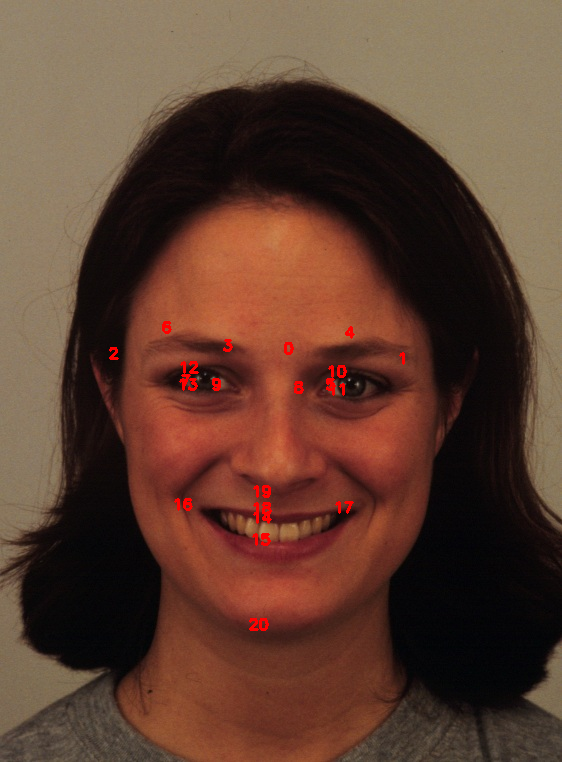

True

In [ ]:
cv2_imshow(new_clone)
cv2.imwrite("points.jpg", new_clone)

In [ ]:
def feature_extractor():
  #Left Eyebrow Length
  left_eyebrow_length = get_distance(22, 26) 
  #Right Eyebrow Length
  right_eyebrow_length = get_distance(17, 21)

  #Left Outer Eyebrow Height
  left_outer_eyebrow_height = get_distance(24, [42, 45])  
  #Right Outer Eyebrow Height
  right_outer_eyebrow_height = get_distance(19, [36, 39]) 

  #Left Inner Eyebrow Height
  left_inner_eyebrow_height = get_distance(22, 42)   
  #Right Inner Eyebrow Height
  right_inner_eyebrow_height = get_distance(21, 39) 

  #Left Eye Height
  left_eye_height = get_distance([43, 44], [47, 46]) 
  #Right Eye Height
  right_eye_height = get_distance([38, 37], [40, 41]) 

  #Mouth Height
  mouth_height = get_distance(62, 66)

  #Mouth Width
  mouth_width = get_distance(48, 54) 

  #Left Lip Height
  left_lip_height = get_distance([42, 45], 54) 

  #Right Lip Height
  right_lip_height = get_distance([36, 39], 48) 

  #Upper Lip Height
  upper_lip_height = get_distance(51, 33) 

  #Jaw Height
  jaw_height = get_distance(8, 33)  

  return [
          left_eyebrow_length , 
          right_eyebrow_length , 
          left_outer_eyebrow_height , 
          right_outer_eyebrow_height , 
          left_inner_eyebrow_height , 
          right_inner_eyebrow_height , 
          left_eye_height , 
          right_eye_height , 
          mouth_height , 
          mouth_width , 
          left_lip_height , 
          right_lip_height , 
          upper_lip_height , 
          jaw_height 
  ]

In [ ]:
features = feature_extractor()

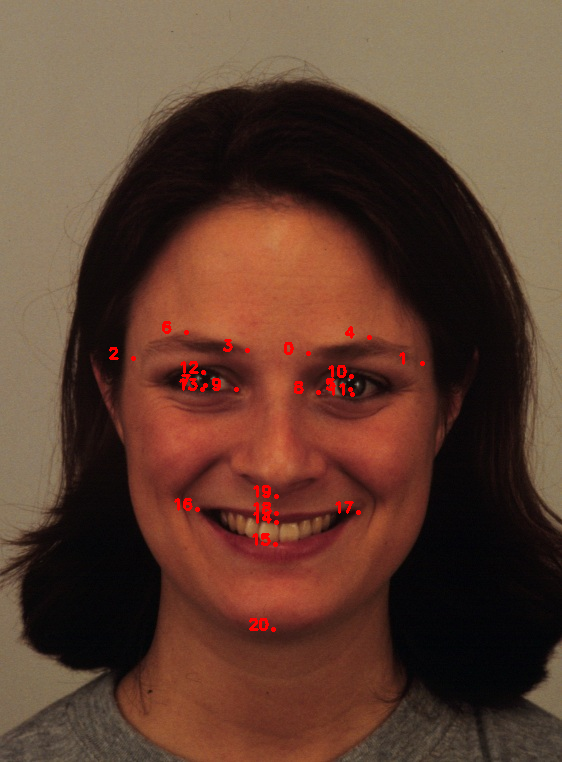

True

In [ ]:
cv2_imshow(new_clone)
cv2.imwrite("points.jpg", clone)

In [ ]:
def totuple(a):
    try:
        return tuple(totuple(i) for i in a)
    except TypeError:
        return a

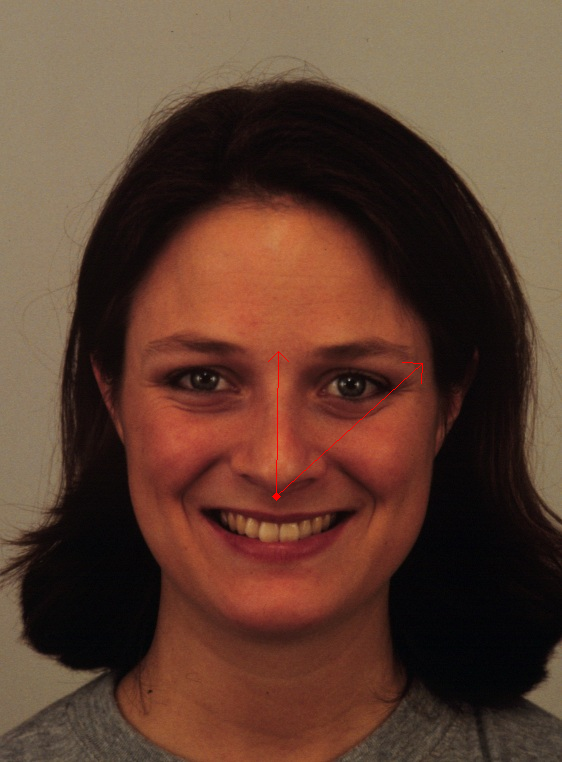

True

In [ ]:
# Red color in BGR  
color = (0, 0, 255)  
  
# Line thickness of 9 px  
thickness = 1

new_clone = image.copy()

cv2.circle(new_clone, (landmarks[0][0][33][0], landmarks[0][0][33][1]), 2, color, 3)


# start_point = totuple((landmarks[0][0][36] + landmarks[0][0][39]) / 2)
# end_point = totuple((landmarks[0][0][42] + landmarks[0][0][45]) / 2)

# cv2.circle(new_clone, start_point, 2, color, 3)
# cv2.circle(new_clone, end_point, 2, color, 3)

# image = cv2.arrowedLine(new_clone, start_point, end_point,  
#                     color, thickness, tipLength = 0.5) 

eye_center = totuple(((landmarks[0][0][22] + landmarks[0][0][22]) / 2 + 
              (landmarks[0][0][21] + landmarks[0][0][21]) / 2) / 2)

end_point = eye_center
start_point = totuple(landmarks[0][0][33])

cv2.arrowedLine(new_clone, start_point, end_point, 
                color, thickness, tipLength = 0.1) 

end_point = totuple(landmarks[0][0][26])
start_point = totuple(landmarks[0][0][33])

cv2.arrowedLine(new_clone, start_point, end_point, 
                color, thickness, tipLength = 0.1) 
                    

cv2_imshow(new_clone)
cv2.imwrite("test.jpg", new_clone)

In [ ]:
data = []
labels = []

for path, subdirs, files in os.walk('KDEF'):
    for name in files:
        img_path = os.path.join(path, name)

        if (img_path.find('S.JPG') != -1):        
          image = cv2.imread(img_path)
          gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
          gray = cv2.equalizeHist(gray)
          
          # Detect faces using the haarcascade classifier on the "grayscale image"
          faces = detector.detectMultiScale(gray)

          if len(faces) != 0:
            # Detect landmarks on "image_gray"
            _, landmarks = landmark_detector.fit(gray, faces)
            if len(landmarks) != 0:
                data.append(landmarks[0])
                labels.append(img_path[14:16])

In [ ]:
print(len(data))
print(len(labels))
print(len(data[0][0]))

980
980
68


In [ ]:
def label_to_num(label):
  if label == 'AF':
    return 0
  if label == 'AN':
    return 1
  if label == 'DI':
    return 2
  if label == 'HA':
    return 3
  if label == 'NE':
    return 4
  if label == 'SA':
    return 5
  if label == 'SU':
    return 6

In [ ]:
emotions = []

for i in range(len(data)):
  emotions.append(label_to_num(labels[i]))

In [ ]:
print(emotions[0])
print(len(emotions))

6
980


Cartesian

In [ ]:
def get_distance(point1, point2, data):
  if type(point1) == int:
    x1, y1 = data[point1]
  elif type(point1) == list:
    x1, y1 = (data[point1[0]] + data[point1[1]]) / 2

  if type(point2) == int:
    x2, y2 = data[point2]
  elif type(point2) == list:
    x2, y2 = (data[point2[0]] + data[point2[1]]) / 2

  return  math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [ ]:
def feature_extractor(data):
  #Left eye center
  left_eye_center_x = (data[36][0] + data[39][0]) / 2
  left_eye_center_y = (data[36][1] + data[39][1]) / 2

  #Right eye center
  right_eye_center_x = (data[41][0] + data[45][0]) / 2
  right_eye_center_y = (data[41][1] + data[45][1]) / 2

  #Eye Center
  eye_center_x = (left_eye_center_x + right_eye_center_x) / 2
  eye_center_y = (left_eye_center_y + right_eye_center_y) / 2

  horizental_norm_distance = math.sqrt( ((left_eye_center_x - right_eye_center_x)**2) + ((left_eye_center_y - right_eye_center_y)**2) )
  vertical_norm_distance = math.sqrt( ((eye_center_x - data[33][0])**2) + ((eye_center_y - data[33][1])**2) )


  #Left Eyebrow Length
  left_eyebrow_length = get_distance(22, 26, data) 
  #Right Eyebrow Length
  right_eyebrow_length = get_distance(17, 21, data)

  #Left Outer Eyebrow Height
  left_outer_eyebrow_height = get_distance(24, [42, 45], data)  
  #Right Outer Eyebrow Height
  right_outer_eyebrow_height = get_distance(19, [36, 39], data) 

  #Left Inner Eyebrow Height
  left_inner_eyebrow_height = get_distance(22, 42, data)   
  #Right Inner Eyebrow Height
  right_inner_eyebrow_height = get_distance(21, 39, data) 

  #Left Eye Height
  left_eye_height = get_distance([43, 44], [47, 46], data) 
  #Right Eye Height
  right_eye_height = get_distance([38, 37], [40, 41], data) 

  #Mouth Height
  mouth_height = get_distance(62, 66, data)

  #Mouth Width
  mouth_width = get_distance(48, 54, data) 

  #Left Lip Height
  left_lip_height = get_distance([42, 45], 54, data) 

  #Right Lip Height
  right_lip_height = get_distance([36, 39], 48, data) 

  #Upper Lip Height
  upper_lip_height = get_distance(51, 33, data) 

  #Jaw Height
  jaw_height = get_distance(8, 33, data)  

  return [
          left_eyebrow_length / vertical_norm_distance, 
          right_eyebrow_length / vertical_norm_distance, 
          left_outer_eyebrow_height / vertical_norm_distance, 
          right_outer_eyebrow_height / vertical_norm_distance, 
          left_inner_eyebrow_height / vertical_norm_distance, 
          right_inner_eyebrow_height / vertical_norm_distance, 
          left_eye_height / vertical_norm_distance, 
          right_eye_height / vertical_norm_distance, 
          mouth_height / vertical_norm_distance, 
          mouth_width / vertical_norm_distance, 
          left_lip_height / vertical_norm_distance, 
          right_lip_height / vertical_norm_distance, 
          upper_lip_height / vertical_norm_distance, 
          jaw_height / vertical_norm_distance
  ]

In [ ]:
features = []

for i in range(len(data)):
    features.append(feature_extractor(data[i][0]))

In [ ]:
num_features = len(features[0])
num_samples = len(features)

In [ ]:
import numpy as np

means = []
stds = []

matrix_by_features = []

for i in range(num_features):
  list_by_features = []
  for feature in features:
    list_by_features.append(feature[i])

  matrix_by_features.append(list_by_features)

for ele in matrix_by_features:
  means.append(np.mean(ele))
  stds.append(np.std(ele))

In [ ]:
print(len(matrix_by_features))
print(len(list_by_features))

14
980


Normal Normalization

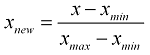

In [ ]:
normalized_matrix_by_features = []

for list_by_features in matrix_by_features:
  normalized_list_by_features = [(i-min(list_by_features))/(max(list_by_features)-min(list_by_features)) for i in list_by_features]

  normalized_matrix_by_features.append(normalized_list_by_features)

In [ ]:
normalized_features = []

for i in range(num_samples):
  normalized_feature = []
  for j in range(num_features):
    normalized_feature.append(normalized_matrix_by_features[j][i])
  normalized_features.append(normalized_feature)

Guassian

Suppose the distance is distributed in Guassian Distribution, normalize the distances by the means and stds.



In [ ]:
normalized_features = []

for feature in features:
  normalized_feature = []
  for i in range(14):
    normalized_dis = ((feature[i] - means[i]) / (2 * stds[i]) + 1) / 2
    if normalized_dis < 0:
      normalized_dis = 0
    elif normalized_dis > 1:
      normalized_dis = 1
    normalized_feature.append(normalized_dis)
  normalized_features.append(normalized_feature)

In [ ]:
train_features = normalized_features[0:900]
train_emotions = emotions[0: 900]

test_features = normalized_features[900:980]
test_emotions = emotions[900: 980]

Polar

Use Polar Distance as the features.

In [ ]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'.   """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [ ]:
features_mags = []
features_angs = []

for sample in data:
  landmarks = sample[0]

  #Left eye center
  left_eye_center_x = (landmarks[36][0] + landmarks[39][0]) / 2
  left_eye_center_y = (landmarks[36][1] + landmarks[39][1]) / 2

  #Right eye center
  right_eye_center_x = (landmarks[41][0] + landmarks[45][0]) / 2
  right_eye_center_y = (landmarks[41][1] + landmarks[45][1]) / 2

  #Eye Center
  eye_center_x = (left_eye_center_x + right_eye_center_x) / 2
  eye_center_y = (left_eye_center_y + right_eye_center_y) / 2

  vertical_norm_distance = math.sqrt( ((eye_center_x - landmarks[33][0])**2) + ((eye_center_y - landmarks[33][1])**2) )

  center_x, center_y = landmarks[33]
  points_list = [22, 26, 17, 21, 24, [42, 45], 19, [36, 39], 42, 39, [43, 44], [46, 47], [38, 37], [40, 41], 62, 66, 48, 54, 51, 33, 8]

  mag_list = []
  ang_list = []

  for point in points_list:
    if (type(point) == int and point != 33):
      x, y = landmarks[point]     
    elif (type(point) == list):
      x, y = (landmarks[point[0]] + landmarks[point[1]]) / 2


    mag = math.sqrt((x - center_x)**2 + (y - center_y)**2) / vertical_norm_distance
    ang = angle_between([x - center_x, y - center_y], [eye_center_x - center_x, eye_center_y - center_y]) / math.pi

    mag_list.append(mag)
    ang_list.append(ang)

  features_mags.append(mag_list)
  features_angs.append(ang_list)

In [ ]:
import numpy as np

mag_means = []
mag_stds = []

ang_means = []
ang_stds = []

matrix_by_features_mag = []
matrix_by_features_ang = []

num_features = len(mag_list)

for i in range(num_features):
  list_by_features = []
  for feature in features_mags:
    list_by_features.append(feature[i])

  matrix_by_features_mag.append(list_by_features)

for ele in matrix_by_features_mag:
  mag_means.append(np.mean(ele))
  mag_stds.append(np.std(ele))

for i in range(num_features):
  list_by_features = []
  for feature in features_angs:
    list_by_features.append(feature[i])

  matrix_by_features_ang.append(list_by_features)

for ele in matrix_by_features_ang:
  ang_means.append(np.mean(ele))
  ang_stds.append(np.std(ele))

In [ ]:
normalized_matrix_by_features_mags = []
normalized_matrix_by_features_angs = []

for list_by_features in features_mags:
  normalized_list_by_features_mags = [(i-min(list_by_features))/(max(list_by_features)-min(list_by_features)) for i in list_by_features]

  normalized_matrix_by_features_mags.append(normalized_list_by_features_mags)

for list_by_features in features_angs:
  normalized_list_by_features_angs = [(i-min(list_by_features))/(max(list_by_features)-min(list_by_features)) for i in list_by_features]

  normalized_matrix_by_features_angs.append(normalized_list_by_features_angs)

In [ ]:
new_features = []

for i in range(len(normalized_matrix_by_features_mags)):
  new_features.append(normalized_matrix_by_features_mags[i] + normalized_matrix_by_features_angs[i])

In [ ]:
new_train_features = new_features[0:900]
train_emotions = emotions[0: 900]

new_test_features = new_features[900:980]
test_emotions = emotions[900: 980]

Combination polar distances and polar distances as features.

In [ ]:
train_com_features = []

for i in range(len(new_train_features)):
  train_com_features.append( new_train_features[i] + train_features[i] )

test_com_features = []

for i in range(len(new_test_features)):
  test_com_features.append( new_test_features[i] + test_features[i] )

SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
output = svc_param_selection(train_com_features, train_emotions, 10)

# from sklearn.metrics import classification_report, confusion_matrix
# print(classification_report(test_emotions, output)) 
# print(confusion_matrix(test_emotions, output))

In [ ]:
output

{'C': 0.1, 'gamma': 1}

In [ ]:
clf = SVC(C = 0.1, kernel='poly', gamma = 1)

clf.fit(train_com_features, train_emotions)

output = clf.predict(test_com_features)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_emotions, output)) 
print(confusion_matrix(test_emotions, output))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.71      0.83      0.77        12
           2       1.00      0.83      0.91        12
           3       1.00      1.00      1.00        11
           4       0.85      1.00      0.92        11
           5       0.89      0.73      0.80        11
           6       0.82      0.75      0.78        12

    accuracy                           0.84        80
   macro avg       0.85      0.84      0.84        80
weighted avg       0.85      0.84      0.84        80

[[ 8  1  0  0  0  0  2]
 [ 0 10  0  0  1  1  0]
 [ 0  2 10  0  0  0  0]
 [ 0  0  0 11  0  0  0]
 [ 0  0  0  0 11  0  0]
 [ 1  1  0  0  1  8  0]
 [ 3  0  0  0  0  0  9]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_com_features, train_emotions)
rf_random.best_params_

NameError: ignored

In [ ]:
rf = RandomForestClassifier(bootstrap= False,
        max_depth= 80,
        max_features= 'sqrt',
        min_samples_leaf= 1,
        min_samples_split= 5,
        n_estimators= 1400)

rf.fit(train_com_features, train_emotions)

output = rf.predict(test_com_features)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_emotions, output)) 
print(confusion_matrix(test_emotions, output))

NameError: ignored

In [ ]:
from scipy.stats import randint, uniform

parameter_space = {
    'hidden_layer_sizes': [(randint.rvs(100,600,1),randint.rvs(100,600,1),), 
                                          (randint.rvs(100,600,1),)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
mlpc = MLPClassifier(max_iter=100)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
mlpc_random = GridSearchCV(mlpc, param_grid = parameter_space, n_jobs=-1, cv=3)
# Fit the random search model
mlpc_random.fit(train_com_features, train_emotions)
mlpc_random.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (581, 293),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [ ]:
mlp = MLPClassifier((581, 293), 'tanh', 'adam', 0.0001, learning_rate= 'constant')
mlp.fit(train_com_features, train_emotions)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(581, 293), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
output = mlp.predict(test_com_features)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_emotions, output)) 
print(confusion_matrix(test_emotions, output))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.89      0.67      0.76        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        11
           4       0.64      0.82      0.72        11
           5       0.70      0.64      0.67        11
           6       0.82      0.75      0.78        12

    accuracy                           0.80        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.81      0.80      0.80        80

[[ 8  0  0  0  1  0  2]
 [ 0  8  0  0  2  2  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 11  0  0  0]
 [ 1  0  0  0  9  1  0]
 [ 1  1  0  0  2  7  0]
 [ 3  0  0  0  0  0  9]]


JF

In [ ]:
!unzip jaffedbase.zip

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

jaf_labels = []
jaf_images = []

for path, subdirs, files in os.walk('jaffedbase'):
    for name in files:
        img_path = os.path.join(path, name)

        if (img_path.find('.tiff') != -1 and img_path.find('FE') == -1):  
          if (img_path.find('FE') != -1):
            jaf_labels.append(0)
          elif (img_path.find('AN') != -1):
            jaf_labels.append(1) 
          elif (img_path.find('DI') != -1):
            jaf_labels.append(2)
          elif (img_path.find('HA') != -1):
            jaf_labels.append(3)
          elif (img_path.find('NE') != -1):
            jaf_labels.append(4)
          elif (img_path.find('SA') != -1):
            jaf_labels.append(5)
          elif (img_path.find('SU') != -1):
            jaf_labels.append(6)


          img = cv2.imread(img_path)
          jaf_images.append(img)

In [ ]:
jaf_data = []

for img in jaf_images:
  # Detect faces using the haarcascade classifier on the "grayscale image"
  faces = detector.detectMultiScale(img)

  if len(faces) != 0:
    # Detect landmarks on "image_gray"
    _, landmarks = landmark_detector.fit(img, faces)
    if len(landmarks) != 0:
      jaf_data.append(landmarks[0])

In [ ]:
import math

jaf_features = []

for i in range(len(jaf_data)):
    jaf_features.append(feature_extractor(jaf_data[i][0]))

In [ ]:
import numpy as np

jaf_means = []
jaf_stds = []

matrix_by_jaf_features = []

for i in range(len(jaf_features[0])):
  list_by_jaf_features = []
  for jaf_feature in jaf_features:
    list_by_jaf_features.append(jaf_feature[i])

  matrix_by_jaf_features.append(list_by_jaf_features)

for ele in matrix_by_jaf_features:
  jaf_means.append(np.mean(ele))
  jaf_stds.append(np.std(ele))

In [ ]:
normalized_jaf_features = []

for jaf_feature in jaf_features:
  normalized_jaf_feature = []
  for i in range(14):
    normalized_jaf_dis = ((jaf_feature[i] - jaf_means[i]) / (2 * jaf_stds[i]) + 1) / 2
    if normalized_jaf_dis < 0:
      normalized_jaf_dis = 0
    elif normalized_jaf_dis > 1:
      normalized_jaf_dis = 1
    normalized_jaf_feature.append(normalized_jaf_dis)
  normalized_jaf_features.append(normalized_jaf_feature)

In [ ]:
jap_features_mags = []
jap_features_angs = []

for sample in data:
  landmarks = sample[0]

  #Left eye center
  left_eye_center_x = (landmarks[36][0] + landmarks[39][0]) / 2
  left_eye_center_y = (landmarks[36][1] + landmarks[39][1]) / 2

  #Right eye center
  right_eye_center_x = (landmarks[41][0] + landmarks[45][0]) / 2
  right_eye_center_y = (landmarks[41][1] + landmarks[45][1]) / 2

  #Eye Center
  eye_center_x = (left_eye_center_x + right_eye_center_x) / 2
  eye_center_y = (left_eye_center_y + right_eye_center_y) / 2

  vertical_norm_distance = math.sqrt( ((eye_center_x - landmarks[33][0])**2) + ((eye_center_y - landmarks[33][1])**2) )

  center_x, center_y = landmarks[33]
  points_list = [22, 26, 17, 21, 24, [42, 45], 19, [36, 39], 42, 39, [43, 44], [46, 47], [38, 37], [40, 41], 62, 66, 48, 54, 51, 33, 8]

  mag_list = []
  ang_list = []

  for point in points_list:
    if (type(point) == int and point != 33):
      x, y = landmarks[point]     
    elif (type(point) == list):
      x, y = (landmarks[point[0]] + landmarks[point[1]]) / 2


    mag = math.sqrt((x - center_x)**2 + (y - center_y)**2) / vertical_norm_distance
    ang = angle_between([x - center_x, y - center_y], [eye_center_x - center_x, eye_center_y - center_y]) / math.pi

    mag_list.append(mag)
    ang_list.append(ang)

  jap_features_mags.append(mag_list)
  jap_features_angs.append(ang_list)

In [ ]:
import numpy as np

jap_mag_means = []
jap_mag_stds = []

jap_ang_means = []
jap_ang_stds = []

jap_matrix_by_features_mag = []
jap_matrix_by_features_ang = []

num_features = len(mag_list)

for i in range(num_features):
  list_by_features = []
  for feature in features_mags:
    list_by_features.append(feature[i])

  jap_matrix_by_features_mag.append(list_by_features)

for ele in jap_matrix_by_features_mag:
  jap_mag_means.append(np.mean(ele))
  jap_mag_stds.append(np.std(ele))

for i in range(num_features):
  list_by_features = []
  for feature in features_angs:
    list_by_features.append(feature[i])

  jap_matrix_by_features_ang.append(list_by_features)

for ele in jap_matrix_by_features_ang:
  jap_ang_means.append(np.mean(ele))
  jap_ang_stds.append(np.std(ele))

In [ ]:
jap_normalized_matrix_by_features_mags = []
jap_normalized_matrix_by_features_angs = []

for list_by_features in features_mags:
  jap_normalized_list_by_features_mags = [(i-min(list_by_features))/(max(list_by_features)-min(list_by_features)) for i in list_by_features]

  jap_normalized_matrix_by_features_mags.append(jap_normalized_list_by_features_mags)

for list_by_features in features_angs:
  jap_normalized_list_by_features_angs = [(i-min(list_by_features))/(max(list_by_features)-min(list_by_features)) for i in list_by_features]

  jap_normalized_matrix_by_features_angs.append(jap_normalized_list_by_features_angs)

In [ ]:
jap_new_features = []

for i in range(len(jap_normalized_matrix_by_features_mags)):
  jap_new_features.append(jap_normalized_matrix_by_features_mags[i] + jap_normalized_matrix_by_features_angs[i])

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
output = svc_param_selection(normalized_jaf_features, jaf_labels, 10)

In [ ]:
clf = SVC(C = 1, kernel='poly', gamma = 1)

clf.fit(normalized_jaf_features[0: 150], jaf_labels[0: 150])

output = clf.predict(normalized_jaf_features)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(jaf_labels, output)) 
print(confusion_matrix(jaf_labels, output))

              precision    recall  f1-score   support

           1       0.90      0.87      0.88        30
           2       0.85      0.97      0.90        29
           3       0.97      1.00      0.98        31
           4       0.97      0.97      0.97        30
           5       1.00      0.90      0.95        31
           6       1.00      0.97      0.98        30

    accuracy                           0.94       181
   macro avg       0.95      0.94      0.94       181
weighted avg       0.95      0.94      0.95       181

[[26  4  0  0  0  0]
 [ 1 28  0  0  0  0]
 [ 0  0 31  0  0  0]
 [ 1  0  0 29  0  0]
 [ 1  1  1  0 28  0]
 [ 0  0  0  1  0 29]]


In [ ]:
output = clf.predict(normalized_jaf_features)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(jaf_labels, output)) 
print(confusion_matrix(jaf_labels, output))

              precision    recall  f1-score   support

           1       0.90      0.87      0.88        30
           2       0.85      0.97      0.90        29
           3       0.97      1.00      0.98        31
           4       0.97      0.97      0.97        30
           5       1.00      0.90      0.95        31
           6       1.00      0.97      0.98        30

    accuracy                           0.94       181
   macro avg       0.95      0.94      0.94       181
weighted avg       0.95      0.94      0.95       181

[[26  4  0  0  0  0]
 [ 1 28  0  0  0  0]
 [ 0  0 31  0  0  0]
 [ 1  0  0 29  0  0]
 [ 1  1  1  0 28  0]
 [ 0  0  0  1  0 29]]


In [ ]:
!pip install ftdetect
!pip install face-alignment

     |████████████████████████████████| 112kB 2.7MB/s 


In [ ]:
rf = RandomForestClassifier(bootstrap= False,
        max_depth= 80,
        max_features= 'sqrt',
        min_samples_leaf= 1,
        min_samples_split= 5,
        n_estimators= 1400)

rf.fit(train_features, train_emotions)

output = rf.predict(test_features)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_emotions, output)) 
print(confusion_matrix(test_emotions, output))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.75      0.55      0.63        11
           2       0.73      0.73      0.73        11
           3       1.00      1.00      1.00        12
           4       0.67      0.73      0.70        11
           5       0.60      0.75      0.67        12
           6       0.69      0.82      0.75        11

    accuracy                           0.73        80
   macro avg       0.73      0.72      0.72        80
weighted avg       0.73      0.72      0.72        80

[[ 6  0  1  0  1  0  4]
 [ 0  6  1  0  2  2  0]
 [ 1  1  8  0  0  1  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0  8  3  0]
 [ 0  1  1  0  1  9  0]
 [ 2  0  0  0  0  0  9]]


In [ ]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(train_features, train_emotions)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [ ]:
sel.get_support()

array([False, False,  True,  True, False, False,  True,  True,  True,
        True, False, False, False, False])

In [ ]:
# Print the name and gini importance of each feature
for feature in rf.feature_importances_:
    print(feature)

0.0346756924731544
0.03464719315337975
0.09116580365686022
0.08176301160159151
0.060912139014572084
0.0641702740618979
0.07944556424392023
0.08974864624902494
0.12936517189849395
0.12556062407292282
0.053654133344793804
0.06375683607880339
0.05393995713278724
0.03719495301779791
